In [2]:
import numpy as np 
import scipy as sp
import pandas as pd 

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


import matplotlib.pyplot as plt

# Correlation Matrix 

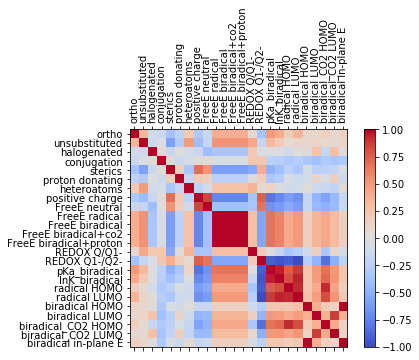

In [6]:
data = pd.read_excel("../../data/quinones_for_Santiago.xlsx")
data = data.drop(labels = ['Quinone #','CO2 in DMF'],axis= 1)

#print(data.columns)

data["biradical LUMO"] = pd.to_numeric(data["biradical LUMO"],downcast="float")
data["biradical_CO2 HOMO"] = pd.to_numeric(data["biradical_CO2 HOMO"],downcast="float")
data["biradical_CO2 LUMO"] = pd.to_numeric(data["biradical_CO2 LUMO"],downcast="float")
data["biradical in-plane E"] = pd.to_numeric(data["biradical in-plane E"],downcast="float")


#print(data.corr())
corr= data.corr()
corr.style.background_gradient(cmap='coolwarm')

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)

ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()


In [5]:
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,ortho,unsubstituted,halogenated,conjugation,sterics,proton donating,heteroatoms,positive charge,FreeE neutral,FreeE radical,FreeE biradical,FreeE biradical+co2,FreeE biradical+proton,REDOX Q/Q1-,REDOX Q1-/Q2-,pKa_biradical,lnK_biradical,radical HOMO,radical LUMO,biradical HOMO,biradical LUMO,biradical_CO2 HOMO,biradical_CO2 LUMO,biradical in-plane E
ortho,1.00,0.34,-0.08,-0.13,-0.35,-0.22,0.20,-0.31,-0.13,0.40,0.40,0.40,0.40,0.09,-0.36,0.50,0.41,0.17,0.35,0.11,0.08,0.17,0.06,0.15
unsubstituted,0.34,1.00,-0.11,-0.03,-0.58,-0.28,0.49,-0.40,-0.17,0.53,0.53,0.53,0.53,0.42,-0.16,0.32,0.21,0.07,0.12,0.08,0.12,0.07,0.07,0.11
halogenated,-0.08,-0.11,1.00,0.04,-0.14,-0.00,-0.08,-0.14,-0.39,-0.33,-0.33,-0.33,-0.33,0.22,-0.02,-0.02,-0.02,-0.09,0.02,0.02,0.26,-0.14,0.28,0.01
conjugation,-0.13,-0.03,0.04,1.00,0.04,-0.12,-0.07,0.04,0.01,-0.05,-0.05,-0.05,-0.05,0.22,0.22,-0.23,-0.25,-0.31,-0.26,-0.32,-0.37,-0.30,-0.34,-0.31
sterics,-0.35,-0.58,-0.14,0.04,1.00,0.17,-0.33,0.69,0.53,-0.60,-0.60,-0.60,-0.60,-0.53,0.38,-0.48,-0.38,-0.23,-0.32,-0.04,-0.24,-0.23,-0.19,-0.04
proton donating,-0.22,-0.28,-0.00,-0.12,0.17,1.00,-0.16,0.20,0.16,-0.23,-0.23,-0.23,-0.23,0.01,0.17,-0.33,-0.27,-0.04,-0.11,-0.09,0.11,-0.04,0.16,-0.13
heteroatoms,0.20,0.49,-0.08,-0.07,-0.33,-0.16,1.00,-0.21,-0.09,0.27,0.27,0.27,0.27,0.36,0.05,0.12,-0.01,-0.10,-0.09,0.02,-0.11,-0.13,-0.19,0.05
positive charge,-0.31,-0.40,-0.14,0.04,0.69,0.20,-0.21,1.00,0.84,-0.72,-0.72,-0.72,-0.72,-0.35,0.74,-0.81,-0.72,-0.60,-0.67,-0.16,-0.46,-0.58,-0.43,-0.15
FreeE neutral,-0.13,-0.17,-0.39,0.01,0.53,0.16,-0.09,0.84,1.00,-0.37,-0.37,-0.37,-0.37,-0.34,0.67,-0.66,-0.61,-0.53,-0.60,-0.15,-0.43,-0.48,-0.42,-0.12
FreeE radical,0.40,0.53,-0.33,-0.05,-0.60,-0.23,0.27,-0.72,-0.37,1.00,1.00,1.00,1.00,0.29,-0.55,0.66,0.60,0.40,0.49,0.14,0.34,0.42,0.30,0.15


In [6]:
data.corr(method= "pearson")

,ortho,unsubstituted,halogenated,conjugation,sterics,proton donating,heteroatoms,positive charge,FreeE neutral,FreeE radical,...,REDOX Q1-/Q2-,pKa_biradical,lnK_biradical,radical HOMO,radical LUMO,biradical HOMO,biradical LUMO,biradical_CO2 HOMO,biradical_CO2 LUMO,biradical in-plane E
ortho,1.000000,0.343627,-0.084770,-0.134652,-0.351773,-0.215679,0.202420,-0.306887,-0.133577,0.396203,...,-0.362083,0.497944,0.405227,0.174882,0.345926,0.109268,0.080199,0.166309,0.056954,0.146474
unsubstituted,0.343627,1.000000,-0.110795,-0.025825,-0.578494,-0.281895,0.488148,-0.401104,-0.166939,0.527882,...,-0.162592,0.324328,0.209494,0.067465,0.116443,0.078326,0.117620,0.071454,0.069783,0.113032
halogenated,-0.084770,-0.110795,1.000000,0.039464,-0.136504,-0.003245,-0.081609,-0.141774,-0.393236,-0.333647,...,-0.024097,-0.015976,-0.017716,-0.091689,0.019071,0.024130,0.256969,-0.143972,0.283777,0.013287
conjugation,-0.134652,-0.025825,0.039464,1.000000,0.039922,-0.118538,-0.066426,0.041831,0.012387,-0.053302,...,0.221194,-0.228332,-0.253596,-0.310781,-0.259900,-0.323787,-0.370043,-0.297620,-0.341987,-0.310991
sterics,-0.351773,-0.578494,-0.136504,0.039922,1.000000,0.168522,-0.332408,0.693359,0.526896,-0.598886,...,0.383046,-0.476652,-0.376908,-0.231854,-0.320339,-0.042958,-0.241972,-0.226742,-0.191959,-0.042946
proton donating,-0.215679,-0.281895,-0.003245,-0.118538,0.168522,1.000000,-0.159126,0.204277,0.163821,-0.232764,...,0.167518,-0.328865,-0.270874,-0.040729,-0.109500,-0.087649,0.106645,-0.039820,0.163407,-0.130487
heteroatoms,0.202420,0.488148,-0.081609,-0.066426,-0.332408,-0.159126,1.000000,-0.205897,-0.088901,0.271107,...,0.048675,0.118180,-0.008227,-0.103673,-0.089296,0.018806,-0.113040,-0.132865,-0.192874,0.050099
positive charge,-0.306887,-0.401104,-0.141774,0.041831,0.693359,0.204277,-0.205897,1.000000,0.842290,-0.724811,...,0.743434,-0.805175,-0.716870,-0.598063,-0.669607,-0.163736,-0.458582,-0.576668,-0.426094,-0.152104
FreeE neutral,-0.133577,-0.166939,-0.393236,0.012387,0.526896,0.163821,-0.088901,0.842290,1.000000,-0.371511,...,0.666024,-0.661274,-0.614427,-0.529100,-0.604106,-0.147897,-0.433340,-0.476933,-0.416968,-0.124348
FreeE radical,0.396203,0.527882,-0.333647,-0.053302,-0.598886,-0.232764,0.271107,-0.724811,-0.371511,1.000000,...,-0.553336,0.664560,0.602979,0.400148,0.494048,0.135585,0.340373,0.421249,0.301406,0.151738


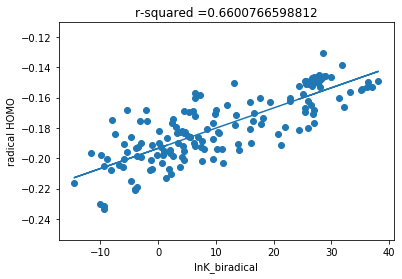

0.6600766598812

In [47]:



x = data['lnK_biradical'].to_numpy().reshape(-1, 1)
y = data['radical HOMO'].to_numpy().reshape(-1, 1)

regr = linear_model.LinearRegression()
regr.fit(x , y)

y_pred = regr.predict(x)
plt.scatter(x,y)

plt.xlabel("lnK_biradical")
plt.ylabel("radical HOMO")

str_temp = "r-squared =" + str(r2_score(y, y_pred))
plt.title(str_temp)

plt.plot(x,y_pred)
plt.show()

r2_score(y, y_pred)



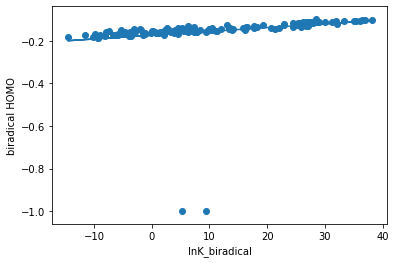

0.05844862757533409

In [21]:
#Here it's weird 


x = data['lnK_biradical'].to_numpy().reshape(-1, 1)
y = data['biradical HOMO'].to_numpy().reshape(-1, 1)

regr = linear_model.LinearRegression()
regr.fit(x , y)

y_pred = regr.predict(x)
plt.scatter(x,y)

plt.xlabel("lnK_biradical")
plt.ylabel("biradical HOMO")

plt.plot(x,y_pred)
plt.show()

r2_score(y, y_pred)

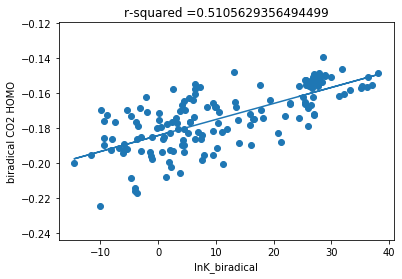

In [45]:

x = data['lnK_biradical'].to_numpy().reshape(-1, 1)
y = data['biradical_CO2 HOMO'].to_numpy().reshape(-1, 1)

regr = linear_model.LinearRegression()
regr.fit(x , y)

y_pred = regr.predict(x)
plt.scatter(x,y)
plt.xlabel("lnK_biradical")
plt.ylabel("biradical CO2 HOMO")

str_temp = "r-squared =" + str(r2_score(y, y_pred))
plt.title(str_temp)

plt.plot(x,y_pred)

plt.show()


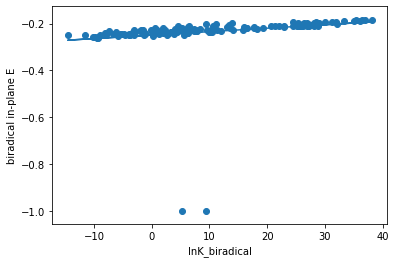

0.04946062673093843

In [17]:
#here it's weird


x = data['lnK_biradical'].to_numpy().reshape(-1, 1)
y = data['biradical in-plane E'].to_numpy().reshape(-1, 1)
regr = linear_model.LinearRegression()
regr.fit(x , y)
plt.xlabel("lnK_biradical")
plt.ylabel('biradical in-plane E')
y_pred = regr.predict(x)
plt.scatter(x,y)
plt.plot(x,y_pred)
plt.show()
r2_score(y, y_pred)



# No Outliers

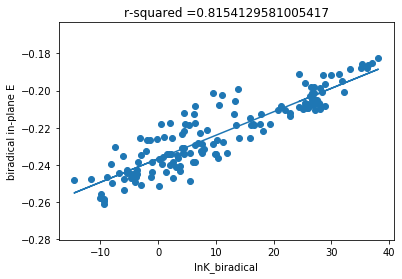

In [43]:
x = np.array(data['lnK_biradical'].to_numpy().reshape(-1, 1))
x = np.concatenate((x[:82],x[83:104],x[105:]))
y = np.array(data['biradical in-plane E'].to_numpy().reshape(-1, 1))
y = np.concatenate((y[:82],y[83:104],y[105:]))
regr = linear_model.LinearRegression()
regr.fit(x , y)
plt.xlabel("lnK_biradical")
plt.ylabel('biradical in-plane E')
y_pred = regr.predict(x)
plt.scatter(x,y)
plt.plot(x,y_pred)

str_temp = "r-squared =" + str(r2_score(y, y_pred))
plt.title(str_temp)

plt.show()

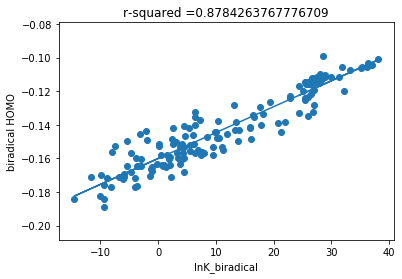

0.8784263767776709

In [44]:

x = np.array(data['lnK_biradical'].to_numpy().reshape(-1, 1))
x = np.concatenate((x[:82],x[83:104],x[105:]))
y = np.array(data['biradical HOMO'].to_numpy().reshape(-1, 1))
y = np.concatenate((y[:82],y[83:104],y[105:]))

regr = linear_model.LinearRegression()
regr.fit(x , y)

y_pred = regr.predict(x)
plt.scatter(x,y)

plt.xlabel("lnK_biradical")
plt.ylabel("biradical HOMO")
plt.plot(x,y_pred)

str_temp = "r-squared =" + str(r2_score(y, y_pred))
plt.title(str_temp)

plt.show()

r2_score(y, y_pred)